In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "utils")))
from analysis_utils import (
    volcano_plot_br,
    plot_spatial_clusters_per_sample,
    plot_dotplot_by_treatment,
    plot_relative_cluster_composition,
    score_and_plot_modules
)
import scanpy as sc
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

pig_genes  = [
    "Apoe", "Arpc1b", "Axl", "B2m", "C1qa", "C1qb", "C1qc", "C4b",
    "Cd63", "Cd9", "Clu", "Csf1r", "Cst3", "Ctsa", "Ctsb", "Ctsd",
    "Ctsh", "Ctsl", "Ctss", "Ctsz", "Cx3cr1", "Cyba", "Fcer1g", "Fcgr3",
    "Fcrls", "Gfap", "Gns", "Grn", "Gusb", "H2-D1", "H2-K1", "Hexa",
    "Hexb", "Igfbp5", "Itgb5", "Itm2b", "Laptm5", "Lgals3bp", "Lgmn", "Ly86",
    "Lyz2", "Man2b1", "Mpeg1", "Npc2", "Olfml3", "Plek", "Prdx6",
    "S100a6", "Serpina3n", "Trem2", "Tyrobp", "Vsir"
]
olig_genes = [
    "Plp1", "Mbp", "Mobp", "Cnp", "Cldn11", "Mal", "Apod", "Trf", "Fth1", "Plekhb1", "Ppp1r14a", "Ttyh2", "Fa2h", "Aspa"
]
modules = {
    "PIG": pig_genes,
    "OLIG": olig_genes
}

In [2]:
ad = sc.read_h5ad('../data/ST_BRICHOS_region.h5ad')

In [3]:
ad

AnnData object with n_obs × n_vars = 25660 × 18751
    obs: 'in_tissue', 'array_row', 'array_col', 'pxl_row_in_fullres', 'pxl_col_in_fullres', 'sample', 'sample_id', 'n_genes', 'leiden', 'treatment', 'barcode', 'region_annotation'
    var: 'n_cells', 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'region_annotation_colors', 'sample_id_colors', 'spatial', 'spatial_metadata_per_sample', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
resolutions = [0.5,0.75 ,1, 1.5 , 2, 2.5]
for resolution in resolutions: 
    print('clustering at resolution '+str(resolution))
    sc.tl.leiden(ad, resolution = resolution, key_added = 'leiden_'+str(resolution))
    print("done")

clustering at resolution 0.5
done
clustering at resolution 0.75
done
clustering at resolution 1
done
clustering at resolution 1.5
done
clustering at resolution 2
done
clustering at resolution 2.5
done


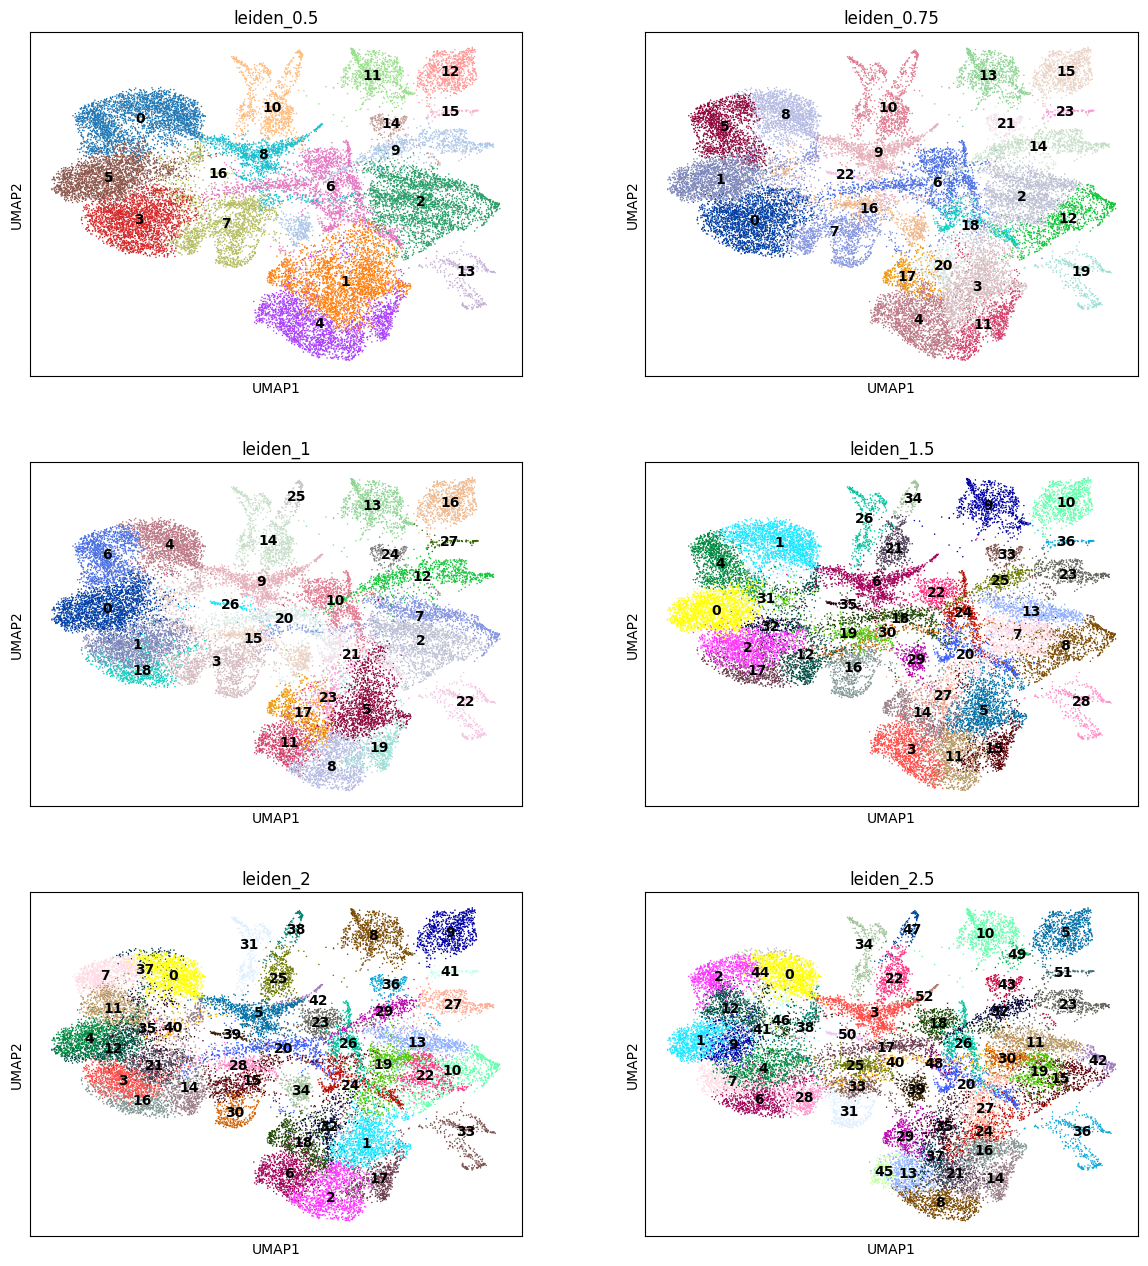

In [5]:
sc.pl.umap(ad, color=["leiden_0.5", "leiden_0.75","leiden_1", "leiden_1.5", "leiden_2","leiden_2.5"], legend_loc='on data', ncols=2)


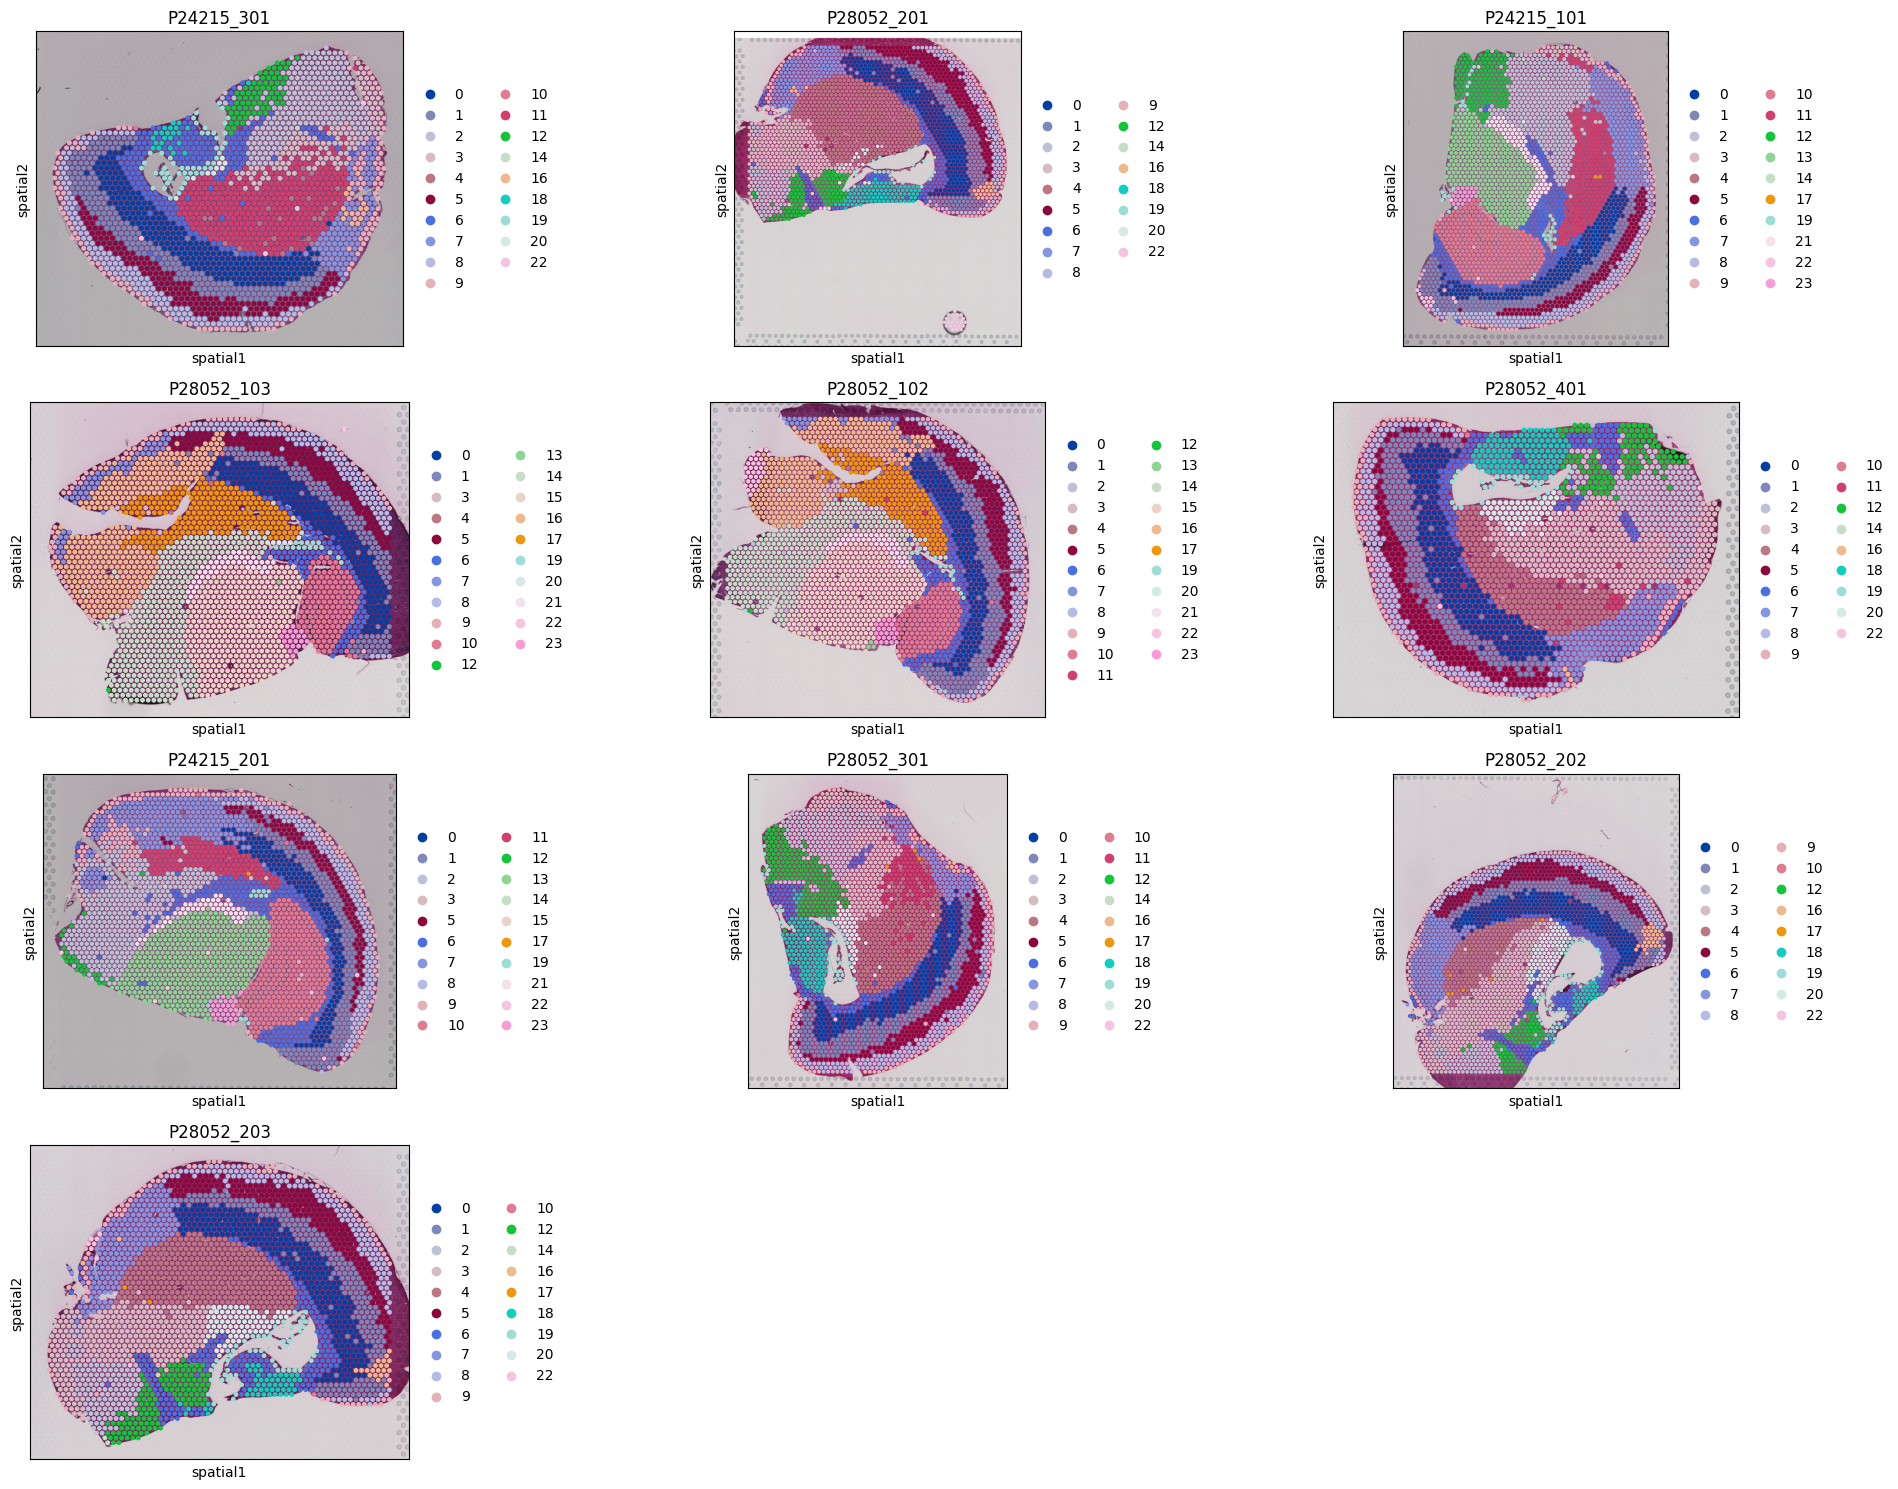

In [6]:
plot_spatial_clusters_per_sample(ad, color = 'leiden_0.75', figsize=(20,15))

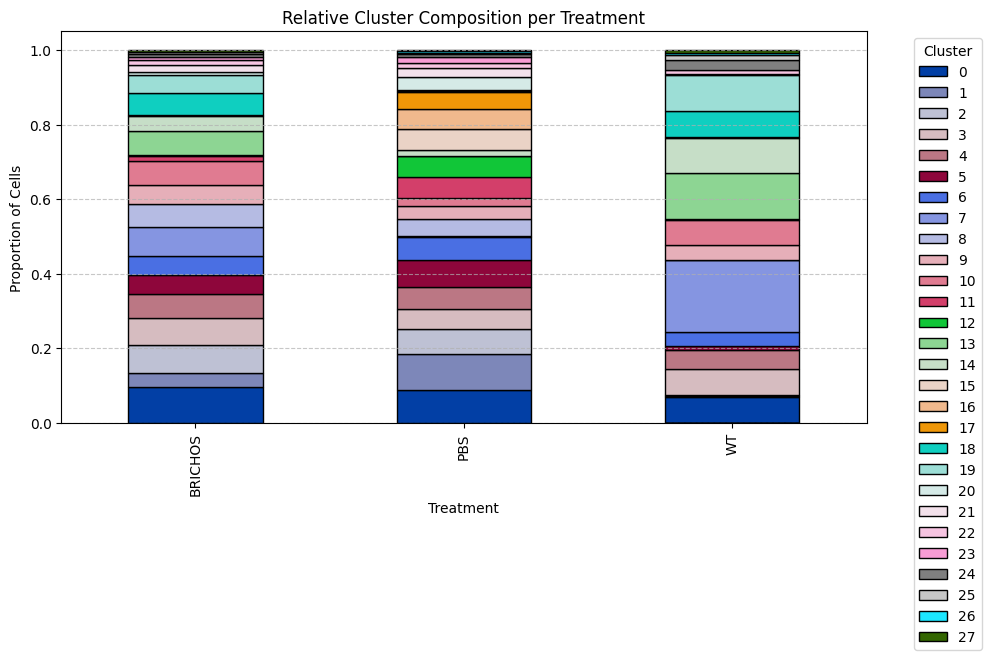

In [7]:
plot_relative_cluster_composition(ad, cluster_key="leiden_1")

In [8]:
sc.tl.rank_genes_groups(ad, groupby='leiden_0.75', method='wilcoxon')

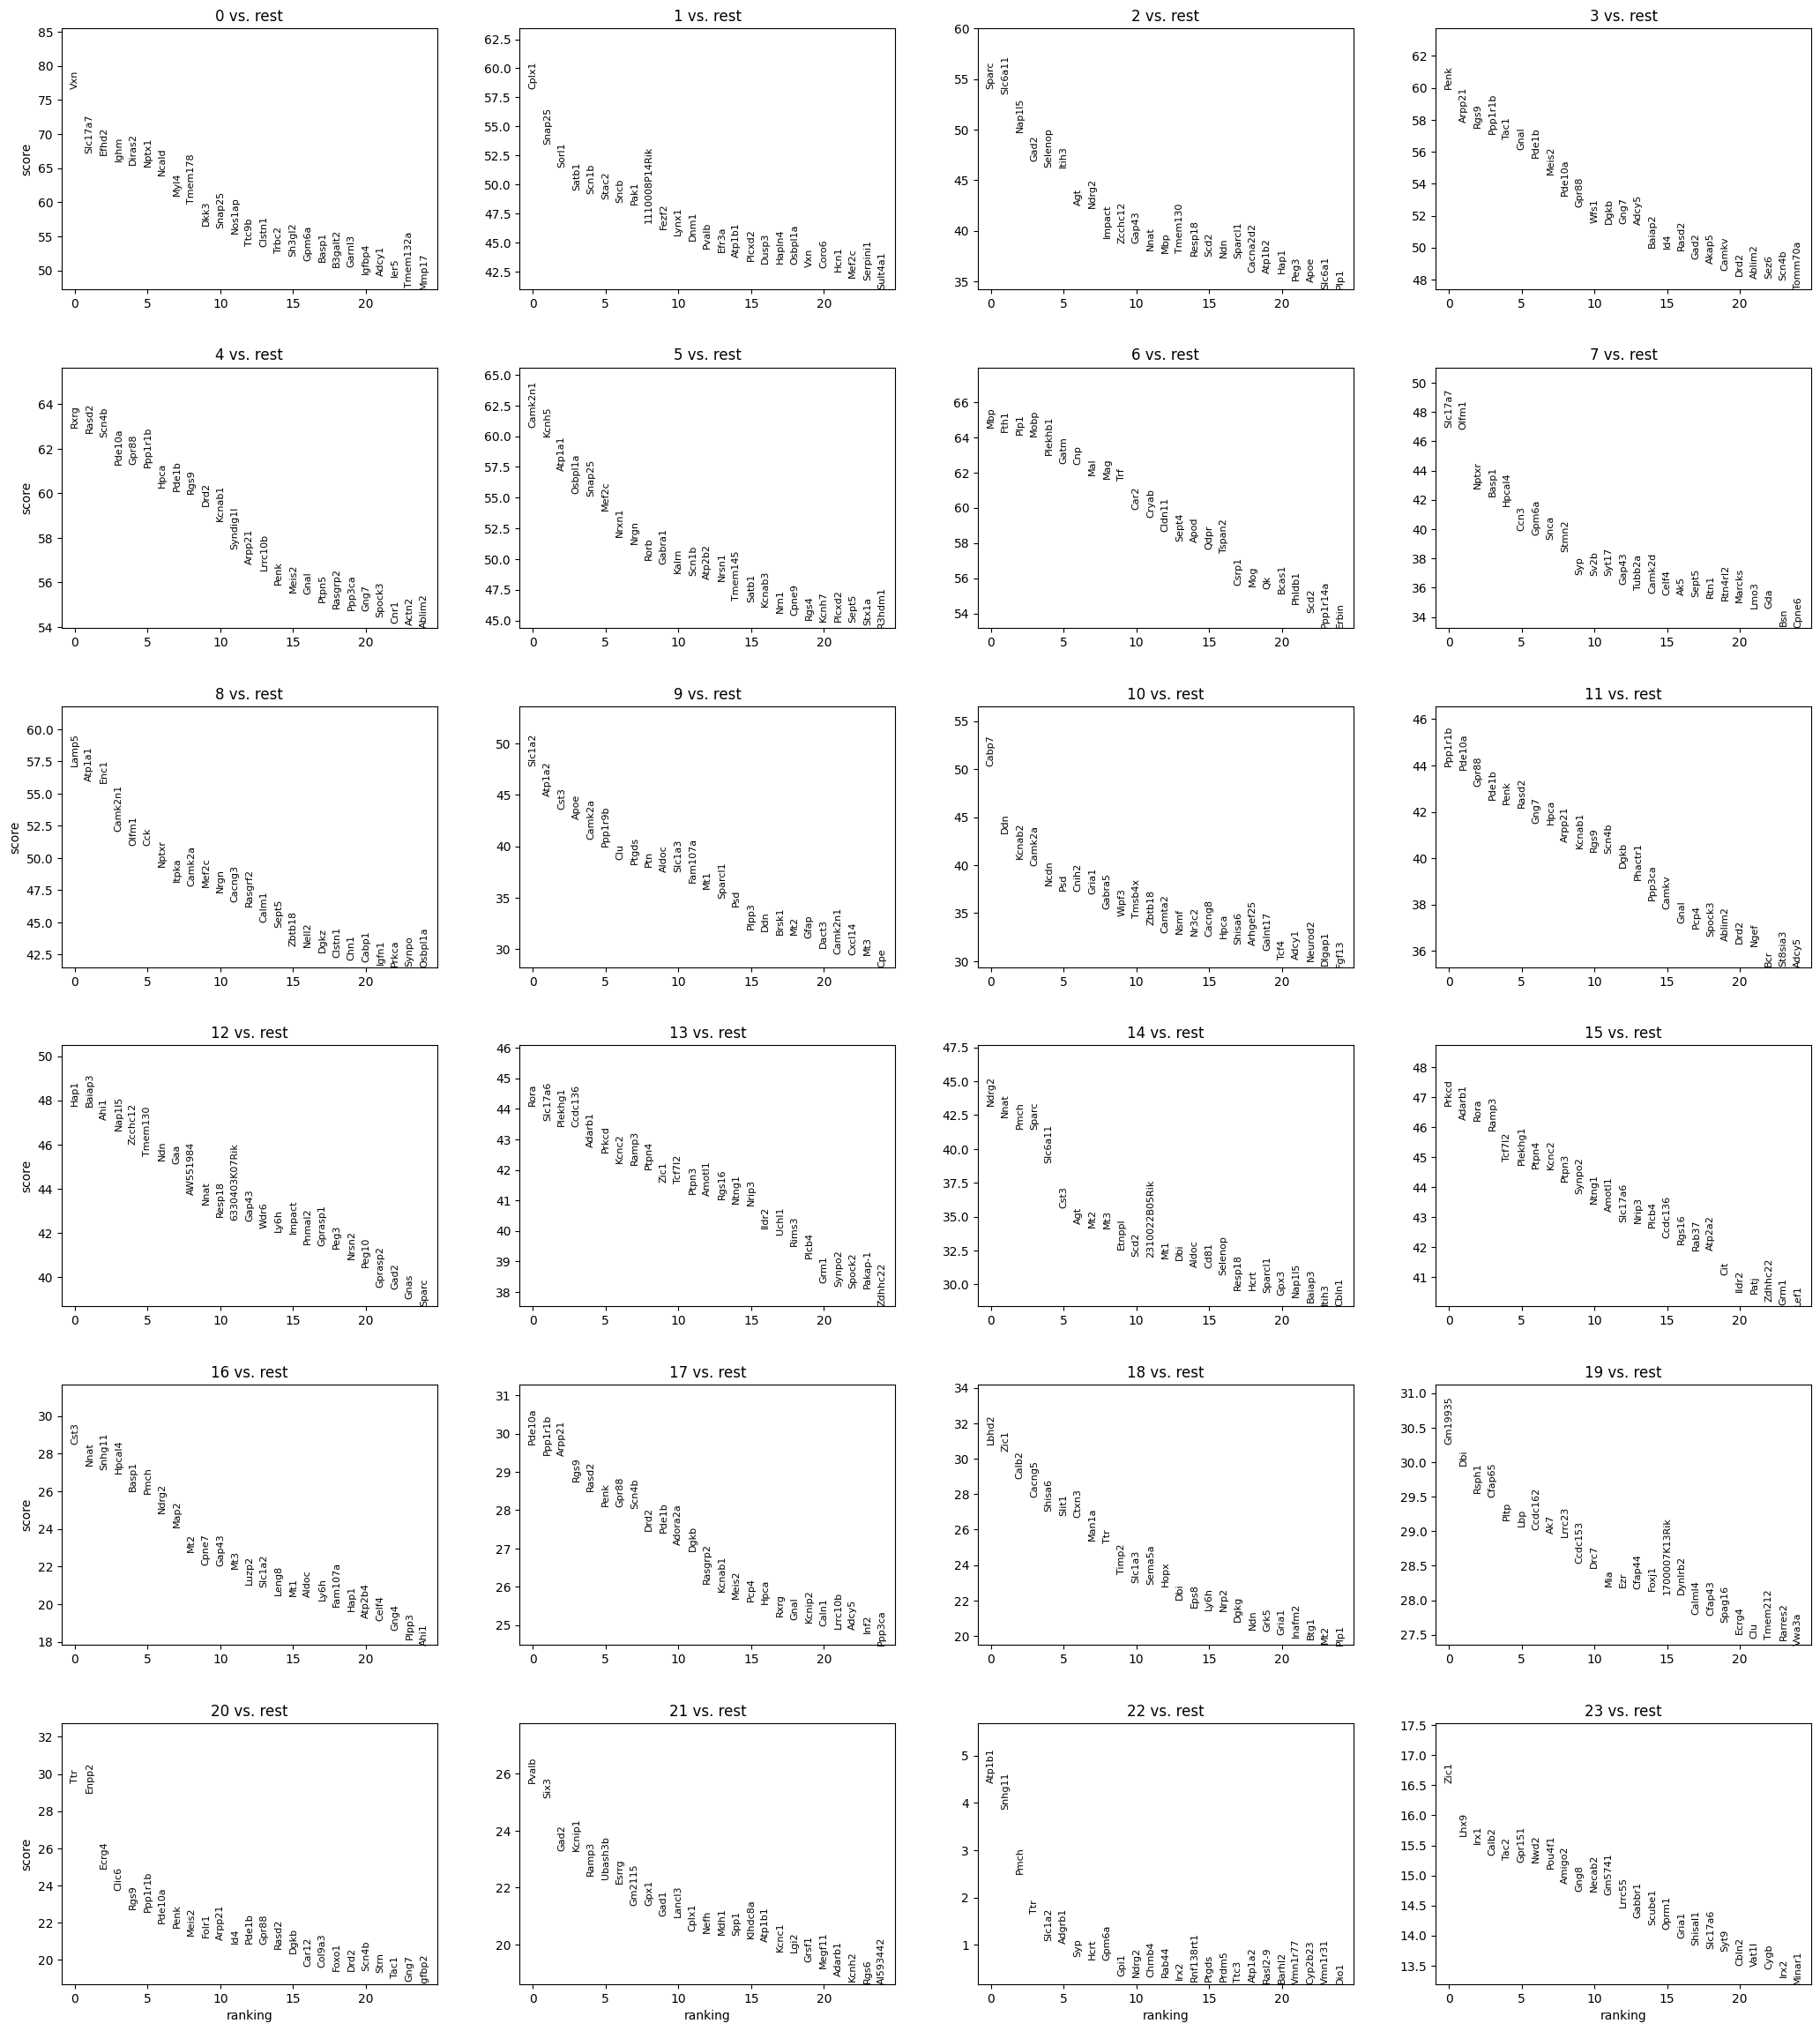

In [9]:
# See top 5 marker genes per cluster
sc.pl.rank_genes_groups(ad, n_genes=25, sharey=False)

In [10]:
marker_genes = pd.DataFrame({
    group: ad.uns['rank_genes_groups']['names'][group][:20]
    for group in ad.uns['rank_genes_groups']['names'].dtype.names
})
marker_genes.head()
#marker_genes.to_csv('../data/marker_genes.csv')

0       1        2        3       4        5        6        7  \
0      Vxn   Cplx1    Sparc     Penk    Rxrg  Camk2n1      Mbp  Slc17a7   
1  Slc17a7  Snap25  Slc6a11   Arpp21   Rasd2    Kcnh5     Fth1    Olfm1   
2    Efhd2   Sorl1   Nap1l5     Rgs9   Scn4b   Atp1a1     Plp1    Nptxr   
3     Ighm   Satb1     Gad2  Ppp1r1b  Pde10a  Osbpl1a     Mobp    Basp1   
4   Diras2   Scn1b  Selenop     Tac1   Gpr88   Snap25  Plekhb1   Hpcal4   

         8       9  ...       14      15      16       17      18       19  \
0    Lamp5  Slc1a2  ...    Ndrg2   Prkcd    Cst3   Pde10a   Lbhd2  Gm19935   
1   Atp1a1  Atp1a2  ...     Nnat  Adarb1    Nnat  Ppp1r1b    Zic1      Dbi   
2     Enc1    Cst3  ...     Pmch    Rora  Snhg11   Arpp21   Calb2    Rsph1   
3  Camk2n1    Apoe  ...    Sparc   Ramp3  Hpcal4     Rgs9  Cacng5   Cfap65   
4    Olfm1  Camk2a  ...  Slc6a11  Tcf7l2   Basp1    Rasd2  Shisa6     Pltp   

      20      21      22     23  
0    Ttr   Pvalb  Atp1b1   Zic1  
1  Enpp2    Six3  Snhg11   Lhx9  
2  Ecrg4    Gad2    Pmch   Irx1  
3  Clic6  Kcnip1     Ttr  Calb2  
4   Rgs9   Ramp3  Slc1a2   Tac2  

[5 rows x 24 columns]

In [11]:
for col in marker_genes.columns: 
    print(col)
    genes = marker_genes[col].tolist()
    print(" ".join(genes))
    print(' ')

0
Vxn Slc17a7 Efhd2 Ighm Diras2 Nptx1 Ncald Myl4 Tmem178 Dkk3 Snap25 Nos1ap Ttc9b Clstn1 Trbc2 Sh3gl2 Gpm6a Basp1 B3galt2 Garnl3
 
1
Cplx1 Snap25 Sorl1 Satb1 Scn1b Stac2 Sncb Pak1 1110008P14Rik Fezf2 Lynx1 Dnm1 Pvalb Efr3a Atp1b1 Plcxd2 Dusp3 Hapln4 Osbpl1a Vxn
 
2
Sparc Slc6a11 Nap1l5 Gad2 Selenop Itih3 Agt Ndrg2 Impact Zcchc12 Gap43 Nnat Mbp Tmem130 Resp18 Scd2 Ndn Sparcl1 Cacna2d2 Atp1b2
 
3
Penk Arpp21 Rgs9 Ppp1r1b Tac1 Gnal Pde1b Meis2 Pde10a Gpr88 Wfs1 Dgkb Gng7 Adcy5 Baiap2 Id4 Rasd2 Gad2 Akap5 Camkv
 
4
Rxrg Rasd2 Scn4b Pde10a Gpr88 Ppp1r1b Hpca Pde1b Rgs9 Drd2 Kcnab1 Syndig1l Arpp21 Lrrc10b Penk Meis2 Gnal Ptpn5 Rasgrp2 Ppp3ca
 
5
Camk2n1 Kcnh5 Atp1a1 Osbpl1a Snap25 Mef2c Nrxn1 Nrgn Rorb Gabra1 Kalrn Scn1b Atp2b2 Nrsn1 Tmem145 Satb1 Kcnab3 Nrn1 Cpne9 Rgs4
 
6
Mbp Fth1 Plp1 Mobp Plekhb1 Gatm Cnp Mal Mag Trf Car2 Cryab Cldn11 Sept4 Apod Qdpr Tspan2 Csrp1 Mog Qk
 
7
Slc17a7 Olfm1 Nptxr Basp1 Hpcal4 Ccn3 Gpm6a Snca Stmn2 Syp Sv2b Syt17 Gap43 Tubb2a Camk2d Celf4 Ak5 Sept5 Rtn1 Rtn4

✅ Scored PIG module with 52 genes
✅ Scored OLIG module with 14 genes


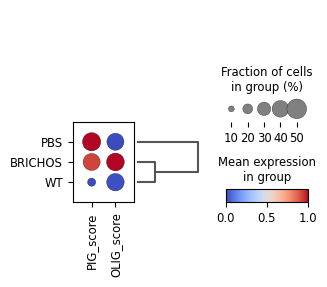

In [16]:
score_and_plot_modules(ad, modules, groupby="treatment")

✅ Scored PIG module with 52 genes
✅ Scored OLIG module with 14 genes


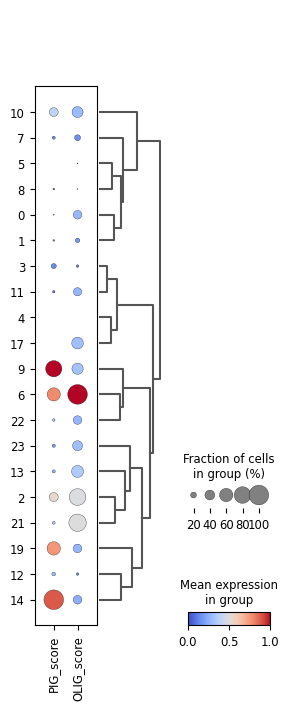

In [17]:
score_and_plot_modules(ad[ad.obs.treatment == 'WT'], modules, groupby="leiden_0.75")

✅ Scored PIG module with 52 genes
✅ Scored OLIG module with 14 genes


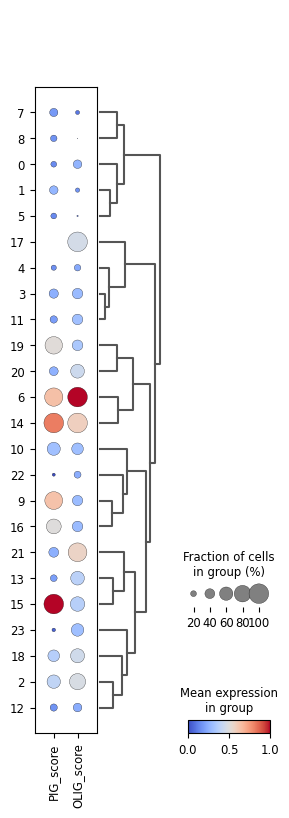

In [18]:
score_and_plot_modules(ad[ad.obs.treatment == 'BRICHOS'], modules, groupby="leiden_0.75")

✅ Scored PIG module with 52 genes
✅ Scored OLIG module with 14 genes


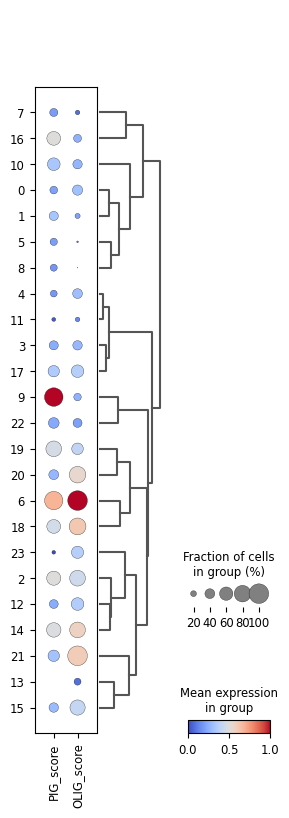

In [19]:
score_and_plot_modules(ad[ad.obs.treatment == 'PBS'], modules, groupby="leiden_0.75")

In [22]:
ad.write('../data/ST_BRICHOS_region_subcluster.h5ad')